In [7]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib


In [8]:

# ============================================================
# 設定（ここだけ変更）
# ============================================================
TRAIN_CSV = "data_train.csv"
TEST_CSV  = "data_test.csv"

TIME_COL  = "t"        # 無ければサンプル番号を使う
LABEL_COL = "label"    # 無ければ色分けなし
SENSOR_COLS = ["s1", "s2", "s3"]     # 例: ["s1","s2","s3"] / Noneなら自動推定（sで始まる列優先）
N_PLOTS = 3            # 上から何本のセンサを描くか（データごとに同じ指定）

label_name = {
    0: "正常",
    1: "周波数変化",
    2: "シフト",
    3: "位相",
    4: "スパイク",
}

# ============================================================
# 1) train/test を読み込み
# ============================================================
df_train = pd.read_csv(TRAIN_CSV)
df_test  = pd.read_csv(TEST_CSV)




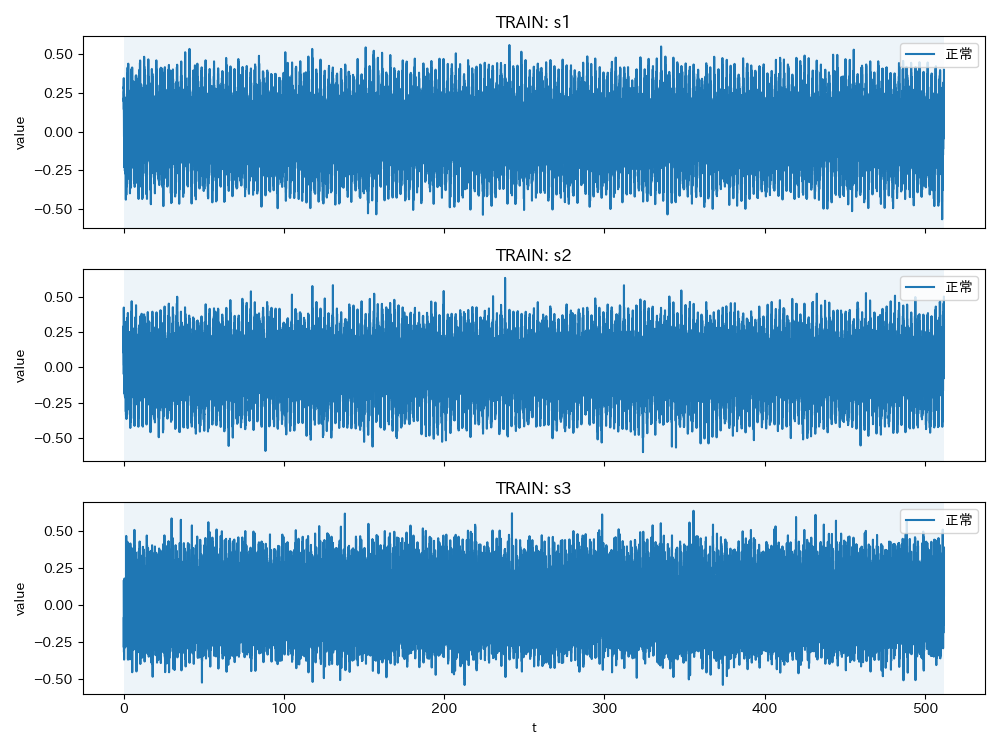

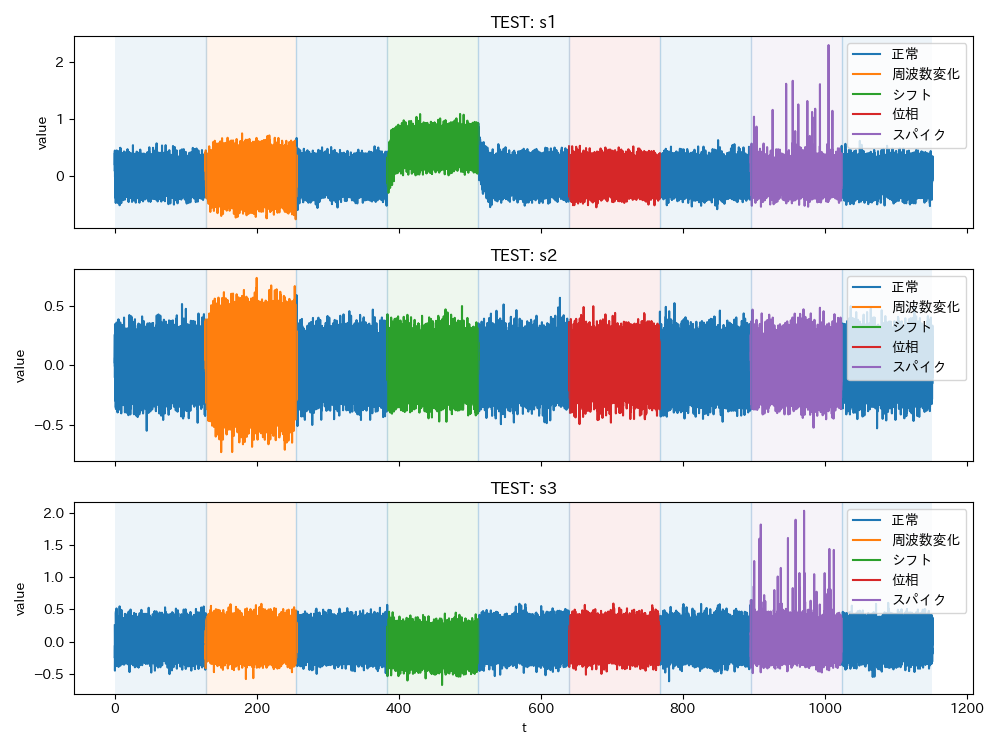

In [9]:
# ============================================================
# 2) TRAIN: x と label（あれば）を準備
# ============================================================
x_tr = df_train[TIME_COL].to_numpy(dtype=float) if TIME_COL in df_train.columns else np.arange(len(df_train), dtype=float)
xlab_tr = TIME_COL if TIME_COL in df_train.columns else "sample_index"

has_lab_tr = (LABEL_COL in df_train.columns)
if has_lab_tr:
    lab_tr = df_train[LABEL_COL].to_numpy()
    lab_tr = lab_tr.astype(int) if np.issubdtype(lab_tr.dtype, np.number) else pd.Series(lab_tr).astype("category").cat.codes.to_numpy()
    chg_tr = np.where(lab_tr[1:] != lab_tr[:-1])[0] + 1
    edges_tr = np.r_[0, chg_tr, len(lab_tr)]

# ============================================================
# 3) TEST: x と label（あれば）を準備
# ============================================================
x_te = df_test[TIME_COL].to_numpy(dtype=float) if TIME_COL in df_test.columns else np.arange(len(df_test), dtype=float)
xlab_te = TIME_COL if TIME_COL in df_test.columns else "sample_index"

has_lab_te = (LABEL_COL in df_test.columns)
if has_lab_te:
    lab_te = df_test[LABEL_COL].to_numpy()
    lab_te = lab_te.astype(int) if np.issubdtype(lab_te.dtype, np.number) else pd.Series(lab_te).astype("category").cat.codes.to_numpy()
    chg_te = np.where(lab_te[1:] != lab_te[:-1])[0] + 1
    edges_te = np.r_[0, chg_te, len(lab_te)]

# 背景色（matplotlibデフォルト色）
def _lab_color(labv):
    return f"C{int(labv) % 10}"

# ============================================================
# 4) プロット（TRAIN） 背景色つき（ラベル列がある時だけ）
# ============================================================
fig, axes = plt.subplots(len(SENSOR_COLS), 1, figsize=(10, 2.5 * len(SENSOR_COLS)), sharex=True)
if len(SENSOR_COLS) == 1:
    axes = [axes]

for ax, col in zip(axes, SENSOR_COLS):
    y = df_train[col].to_numpy(dtype=float)

    if has_lab_tr:
        # 背景（ラベル区間ごと）
        for a, b in zip(edges_tr[:-1], edges_tr[1:]):
            labv = int(lab_tr[a])
            x0 = float(x_tr[a])
            x1 = float(x_tr[b]) if b < len(x_tr) else float(x_tr[-1])
            ax.axvspan(x0, x1, color=_lab_color(labv), alpha=0.08, linewidth=0)

        # 線（ラベルごと）
        for labv in sorted(np.unique(lab_tr)):
            m = (lab_tr == labv)
            ax.plot(x_tr[m], y[m], label=label_name.get(int(labv), str(int(labv))))

        # 区間境界線
        for idx in chg_tr:
            ax.axvline(float(x_tr[idx]), linewidth=1.0, alpha=0.25)

        ax.legend(loc="upper right", frameon=True)
    else:
        ax.plot(x_tr, y, label=col)
        ax.legend(loc="upper right", frameon=True)

    ax.set_title(f"TRAIN: {col}")
    ax.set_ylabel("value")

axes[-1].set_xlabel(xlab_tr)
fig.tight_layout()
plt.show()

# ============================================================
# 5) プロット（TEST） 背景色つき（ラベル列がある時だけ）
# ============================================================
fig, axes = plt.subplots(len(SENSOR_COLS), 1, figsize=(10, 2.5 * len(SENSOR_COLS)), sharex=True)
if len(SENSOR_COLS) == 1:
    axes = [axes]

for ax, col in zip(axes, SENSOR_COLS):
    y = df_test[col].to_numpy(dtype=float)

    if has_lab_te:
        # 背景（ラベル区間ごと）
        for a, b in zip(edges_te[:-1], edges_te[1:]):
            labv = int(lab_te[a])
            x0 = float(x_te[a])
            x1 = float(x_te[b]) if b < len(x_te) else float(x_te[-1])
            ax.axvspan(x0, x1, color=_lab_color(labv), alpha=0.08, linewidth=0)

        # 線（ラベルごと）
        for labv in sorted(np.unique(lab_te)):
            m = (lab_te == labv)
            ax.plot(x_te[m], y[m], label=label_name.get(int(labv), str(int(labv))))

        # 区間境界線
        for idx in chg_te:
            ax.axvline(float(x_te[idx]), linewidth=1.0, alpha=0.25)

        ax.legend(loc="upper right", frameon=True)
    else:
        ax.plot(x_te, y, label=col)
        ax.legend(loc="upper right", frameon=True)

    ax.set_title(f"TEST: {col}")
    ax.set_ylabel("value")

axes[-1].set_xlabel(xlab_te)
fig.tight_layout()
plt.show()


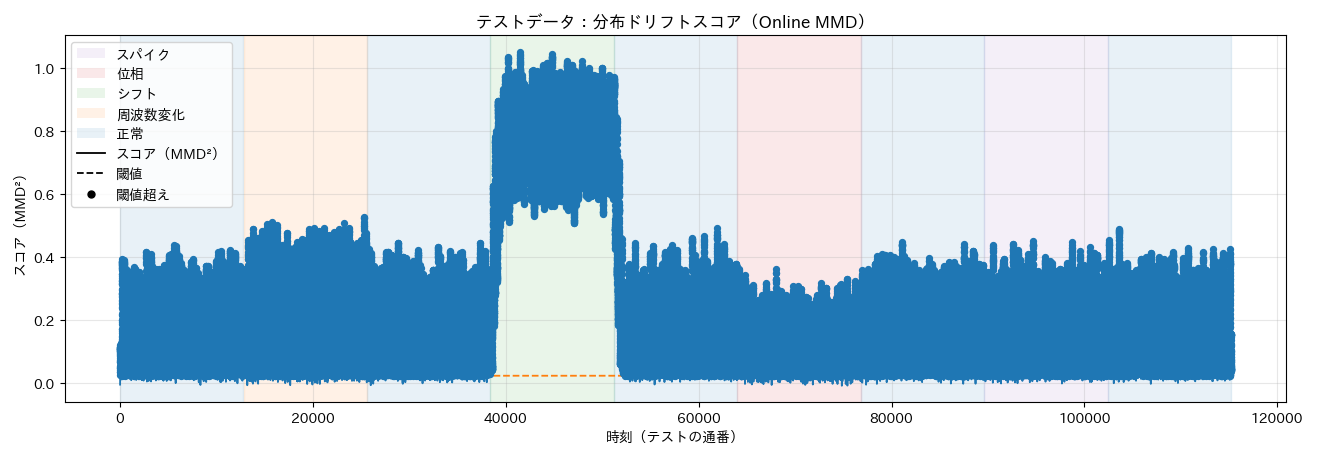

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# ============================================================
# 設定（ここだけ変更）
# ============================================================
LABEL_COL = "label"   # 無ければ None にする（例: LABEL_COL = None）

label_name = {
    0: "正常",
    1: "周波数変化",
    2: "シフト",
    3: "位相",
    4: "スパイク",
}

# 背景色（label_name に合わせて追加）
label_color = {
    0: "C0",
    1: "C1",
    2: "C2",
    3: "C3",
    4: "C4",
}

# ============================================================
# スコア算出（テストを1点ずつ流してログ化）
# ============================================================
n = X_test_std.shape[0]
mmd2 = np.full(n, np.nan, dtype=float)
thr  = np.full(n, np.nan, dtype=float)
is_drift = np.zeros(n, dtype=int)

for i in range(n):
    out = cd.predict(X_test_std[i], return_test_stat=True)
    d = out["data"]
    mmd2[i] = float(d.get("test_stat", np.nan))
    thr[i]  = float(d.get("threshold", np.nan))
    is_drift[i] = int(d.get("is_drift", 0))

df_log_test = pd.DataFrame({
    "i": np.arange(n),
    "mmd2": mmd2,
    "threshold": thr,
    "is_drift": is_drift,
})

has_label = (LABEL_COL is not None) and (LABEL_COL in df_test.columns)
if has_label:
    y_test = df_test[LABEL_COL].to_numpy()[:n]
    y_test = y_test.astype(int) if np.issubdtype(y_test.dtype, np.number) else y_test
    df_log_test["label"] = y_test


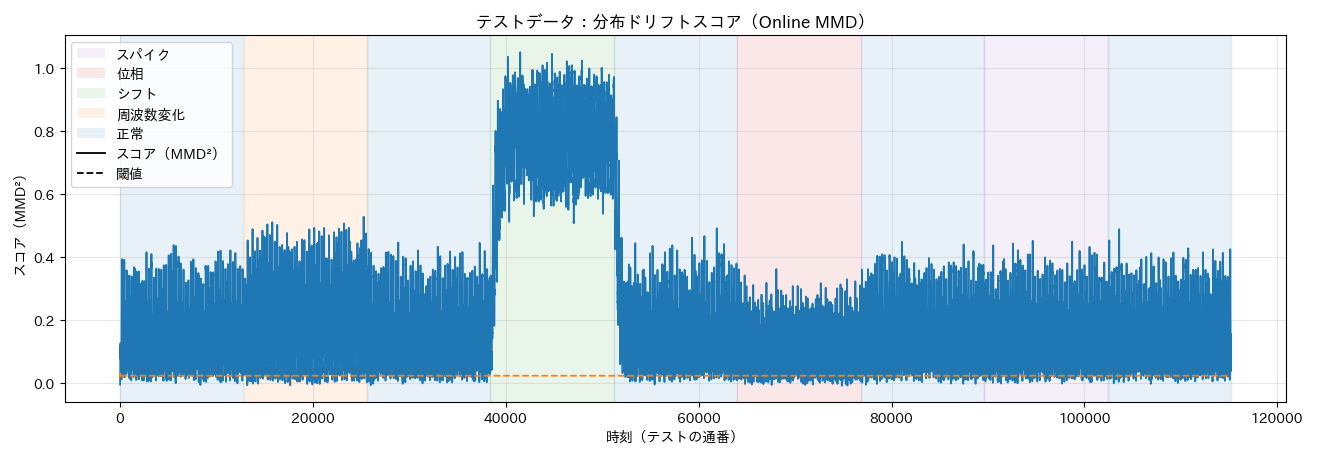

In [14]:

# ============================================================
# 可視化：スコア波形 + 閾値 + 閾値超えマーカー + （任意）ラベル背景
# ============================================================
t = df_log_test["i"].to_numpy()

fig, ax = plt.subplots(figsize=(13.2, 4.6))
ax.set_axisbelow(True)

# 背景をラベル区間で塗る（ラベルがある時だけ）
if has_label:
    y = df_log_test["label"].to_numpy()
    change = np.flatnonzero(y[1:] != y[:-1]) + 1
    bounds = np.r_[0, change, len(y)]
    for k in range(len(bounds) - 1):
        a, b = bounds[k], bounds[k + 1]
        lab = y[a]
        # 数値ラベル前提（文字ラベルも一応許容）
        key = int(lab) if np.issubdtype(np.array([lab]).dtype, np.number) else lab
        ax.axvspan(t[a], t[b - 1], alpha=0.10, color=label_color.get(key, "0.85"), zorder=0)

# スコアと閾値
ax.plot(t, df_log_test["mmd2"].to_numpy(), linewidth=1.3, label="スコア（MMD²）", zorder=2)
ax.plot(t, df_log_test["threshold"].to_numpy(), linestyle="--", linewidth=1.3, label="閾値", zorder=2)


ax.set_title("テストデータ：分布ドリフトスコア（Online MMD）")
ax.set_xlabel("時刻（テストの通番）")
ax.set_ylabel("スコア（MMD²）")
ax.grid(True, alpha=0.30)

# 凡例（背景色=区間ラベルも入れる：ラベルがある時だけ）
handles = [
    Line2D([0],[0], color="k", linewidth=1.3, label="スコア（MMD²）"),
    Line2D([0],[0], color="k", linestyle="--", linewidth=1.3, label="閾値"),
]
if has_label:
    # label_name の定義順に出す（存在するラベルだけ）
    labs_present = list(dict.fromkeys(df_log_test["label"].tolist()))
    for lab in labs_present:
        key = int(lab) if np.issubdtype(np.array([lab]).dtype, np.number) else lab
        nm = label_name.get(key, str(key))
        col = label_color.get(key, "0.85")
        handles.insert(0, Patch(facecolor=col, alpha=0.10, label=nm))

ax.legend(handles=handles, loc="upper left", frameon=True)

plt.tight_layout()
plt.show()
